### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

## how different is the DIC field in 'newest' vs. RIV12-compatible restart?

    newest = /gpfs/home/avd22gnu/scratch/WOA/scripts/restart_17491231_trc_PT.nc
    riv12-compatible = /gpfs/home/e031/scratch/TOM12_ET_PIHM/ORCA2_00273750_restart_trc.nc

In [4]:
new_rs = xr.open_dataset('/gpfs/home/avd22gnu/scratch/WOA/scripts/restart_17491231_trc_PT.nc')
riv_rs = xr.open_dataset('/gpfs/home/e031/scratch/TOM12_ET_PIHM/ORCA2_00273750_restart_trc.nc')

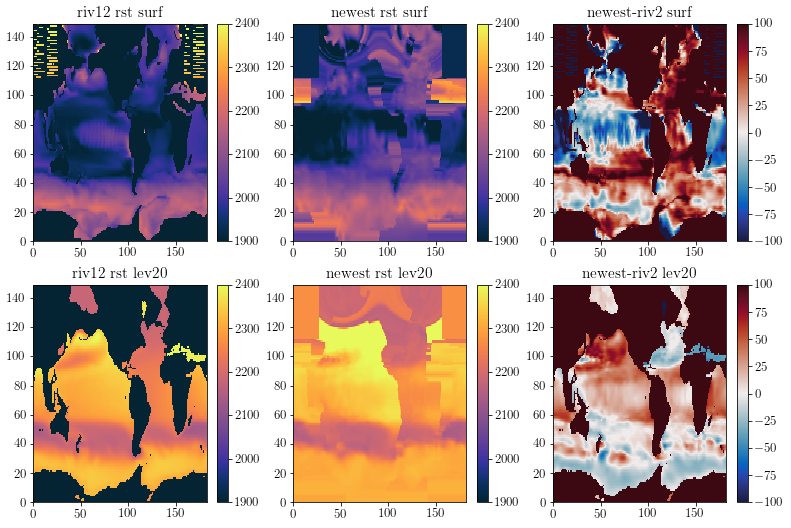

In [28]:
fact = 1.1
fig, axs = plt.subplots(2,3, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

w = axs[0].pcolormesh(riv_rs['TRBDIC'][0,0,:,:]*1e6, vmin = 1900, vmax = 2400, cmap = cm.thermal)
plt.colorbar(w, ax = axs[0])
w = axs[1].pcolormesh(new_rs['TRBDIC'][0,:,:]*1e6, vmin = 1900, vmax = 2400, cmap = cm.thermal)
plt.colorbar(w, ax = axs[1])
w = axs[2].pcolormesh((new_rs['TRBDIC'][0,:,:]-riv_rs['TRBDIC'][0,0,:,:])*1e6, vmin = -100, vmax = 100, cmap = cm.balance)
plt.colorbar(w, ax = axs[2])


w = axs[3].pcolormesh(riv_rs['TRBDIC'][0,20,:,:]*1e6, vmin = 1900, vmax = 2400, cmap = cm.thermal)
plt.colorbar(w, ax = axs[3])
w = axs[4].pcolormesh(new_rs['TRBDIC'][20,:,:]*1e6, vmin = 1900, vmax = 2400, cmap = cm.thermal)
plt.colorbar(w, ax = axs[4])
w = axs[5].pcolormesh((new_rs['TRBDIC'][20,:,:]-riv_rs['TRBDIC'][0,20,:,:])*1e6, vmin = -100, vmax = 100, cmap = cm.balance)
plt.colorbar(w, ax = axs[5])

tits = ['riv12 rst surf', 'newest rst surf', 'newest-riv2 surf','riv12 rst lev20', 'newest rst lev20', 'newest-riv2 lev20']
for i in range(0,6):
    axs[i].set_title(tits[i])

## atmospheric co2

In [ ]:
#atmco2.dat.variable:/gpfs/data/greenocean/software/resources/ModelResources/AtmosCO2/atmco2_dw_edit_4200_v2.dat
#atmco2.dat.static:/gpfs/data/greenocean/software/resources/ModelResources/AtmosCO2/atmco2_dw_edit_4200_v2_CONSTANT_1750.dat
#atmco2.dat.variable:/gpfs/home/mep22dku/scratch/GCB2023_atmco2/gcbco2_2023_4200_v2_padding.dat

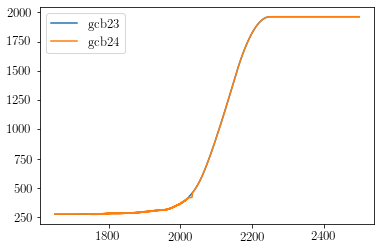

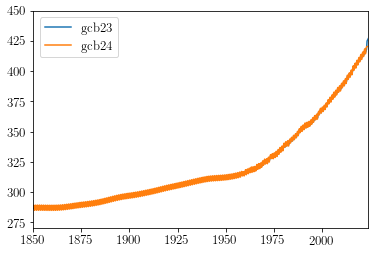

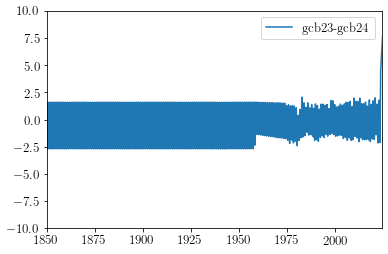

In [42]:
#column_names = ['yr', 'Column2', 'Column3']

gcb23 = '/gpfs/home/mep22dku/scratch/GCB2023_atmco2/gcbco2_2023_4200_v2_padding.dat'
# Read the .dat file with custom column names
df23 = pd.read_csv(gcb23, delimiter='\t')

gcb24 = '/gpfs/home/mep22dku/scratch/GCB2023_atmco2/gcbco2_2024_4200_v2_padding.dat'
# Read the .dat file with custom column names
df24 = pd.read_csv(gcb24, delimiter='\t')
plt.figure()
plt.plot(df23['1650.042'],df23['276.58'], label = 'gcb23')
plt.plot(df24['1650.042'],df24['276.58'], label = 'gcb24')
plt.legend()

plt.figure()
plt.plot(df23['1650.042'],df23['276.58'], label = 'gcb23')
plt.plot(df24['1650.042'],df24['276.58'], label = 'gcb24')
plt.xlim([1850,2024])
plt.ylim([270,450])
plt.legend()

plt.figure()
plt.plot(df23['1650.042'],df23['276.58']-df24['276.58'], label = 'gcb23-gcb24')

plt.xlim([1850,2024])
plt.ylim([-10,10])
plt.legend()